<a href="https://colab.research.google.com/github/BranislavMajernik/zerocode/blob/master/FFTNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

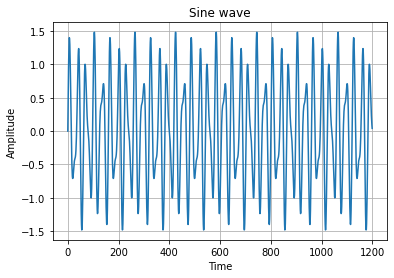

In [2]:
#  sample points
N = 1200

# sample spacing
T = 1.0 / 1600.0

x = np.linspace(0.0, N*T, N, endpoint=False)
sum = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(sum)
plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.show()

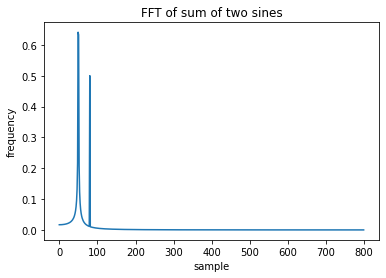

In [3]:
sumf = fft(sum)
xf = fftfreq(N, T)[:N//2]
plt.ylabel('frequency')
plt.xlabel('sample')
plt.title("FFT of sum of two sines")
plt.plot(xf, 2.0/N * np.abs(sumf[0:N//2]))
plt.show()

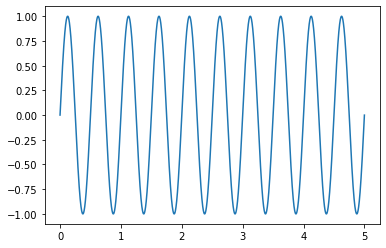

In [4]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [8]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
# _, ocakavana premenna, ale sa nepouziva
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone
# zasumena povodna funkcia

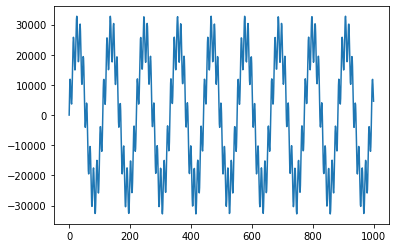

In [6]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [9]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

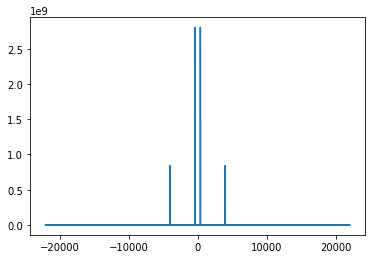

In [10]:
# Pouzijeme Furierovu transformaciu na odstranenie sumu
# Najpr najdeme sumovu frekvenciu
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [11]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)
#fft() calculates the transform itself.
#fftfreq() calculates the frequencies in the center of each bin in the output of fft(). Without this, there would be no way to plot the x-axis on your frequency spectrum.
# https://realpython.com/python-scipy-fft/

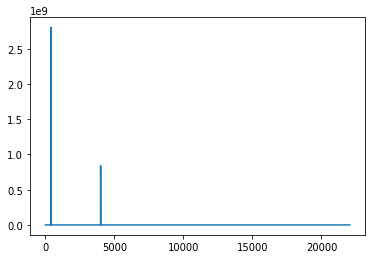

In [13]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front, pouzitie rychlej fft
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [14]:
# Filtrovanie
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

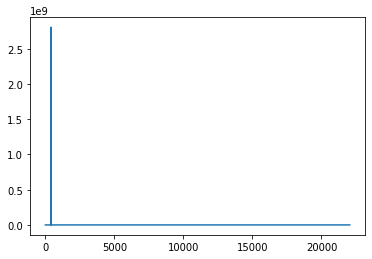

In [15]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

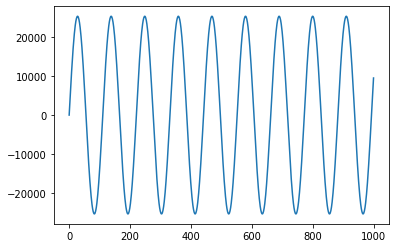

In [16]:
# Inverzna FFT
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [17]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)